In [5]:
import format
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# models
from sklearn import linear_model
from sklearn import neural_network
from sklearn import svm 
from sklearn import neighbors

In [6]:
def load_dataset(take_weighted_average):
    # Load dataset here 
    dataset = format.load("a_1")

    # preprocess? or use raw data?
    if take_weighted_average:
        # weighted average x,y coord
        df = format.toDataFrameWeighted(format.weightedAvg(format.reduce(dataset),keep_motors=True))
    else:
        # raw data
        df = format.toDataFrame(format.reduce(dataset))
    return df


# Selecting a Modelling Technique 

## Linear Models 

<IPython.core.display.Javascript object>


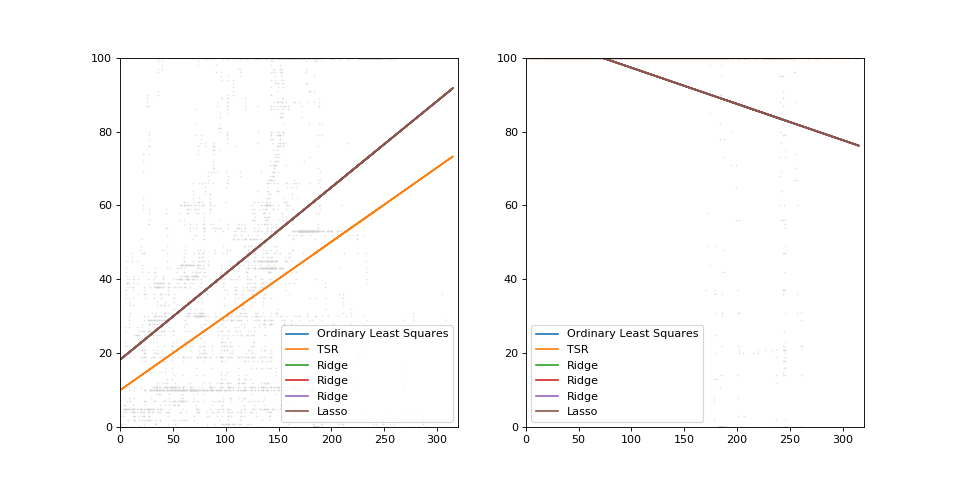

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [7]:
df = load_dataset(True)

plt.figure(dpi=80, figsize=(12, 6))
plt.tight_layout()

X = df.x.values.reshape(-1,1)

for i, y in enumerate([df.left, df.right]):
    
    # fit linear models 
    ols = linear_model.LinearRegression().fit(X,y)
    tsr = linear_model.TheilSenRegressor().fit(X,y)
    ridA = linear_model.Ridge(alpha=10**-2).fit(X,y)
    ridB = linear_model.Ridge(alpha=10**-6).fit(X,y)
    ridC = linear_model.Ridge(alpha=10**-10).fit(X,y)
    lasA = linear_model.Lasso().fit(X,y)    

    # plot data
    ax = plt.subplot(1,2,i+1)
    ax.scatter(X,y,s=0.1,c='lightgrey')    
    
    # plot models
    ols, = ax.plot(X,ols.predict(X))
    tsr, = ax.plot(X,tsr.predict(X))
    ridA, = ax.plot(X,ridA.predict(X))
    ridB, = ax.plot(X,ridB.predict(X))
    ridC, = ax.plot(X,ridC.predict(X))
    lasA, = ax.plot(X,lasA.predict(X))
    plt.ylim([0,100])
    plt.xlim([0,320])
    plots = [ols,tsr,ridA,ridB,ridC,lasA]
    names = ["Ordinary Least Squares","TSR","Ridge","Ridge","Ridge","Lasso"]
    ax.legend(plots,names)

## Non-Linear Models

<IPython.core.display.Javascript object>


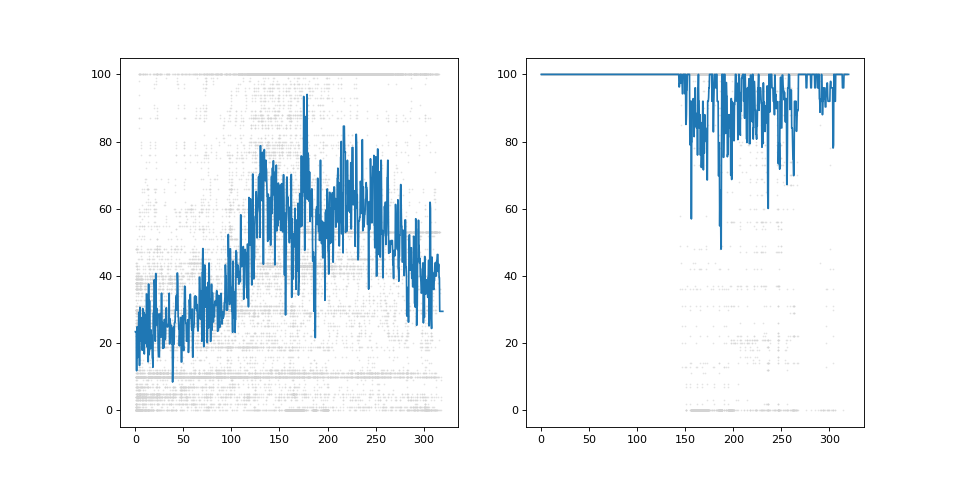

In [10]:
from sklearn.model_selection import GridSearchCV
from scipy import optimize

df = load_dataset(False)

plt.figure(dpi=80, figsize=(12, 6))
plt.tight_layout()

X = df.x.values.reshape(-1,1)

for i, y in enumerate([df.left, df.right]):
        
    # Support Vector Regression
#     gs = GridSearchCV(svm.SVR(kernel="poly"),{"C":[1],"gamma":[0.005],"epsilon":[50,100]},scoring="r2")    
#     gs.fit(X,y)
#     svr = gs.best_estimator_
#     print(svr)
    
    # Kernel Ridge Regression
#     gs = GridSearchCV(svm.SVR(kernel="poly"),{"C":[1],"gamma":[0.005],"epsilon":[40]},scoring="r2",verbose=2,cv=2)    
#     gs.fit(X,y)
#     krr = gs.best_estimator_
#     print(" ")

    neigh = neighbors.KNeighborsRegressor(n_neighbors=25)
    n = neigh.fit(X, y) 
    
    # plot data
    ax = plt.subplot(1,2,i+1)
    ax.scatter(X,y,s=0.1,c='lightgrey')    
    
    # plot models
#     svreg, = ax.plot(X,svr.predict(X))

    z = np.linspace(0,320,1000).reshape(-1,1)
    ax.plot(z,n.predict(z))

#     plt.ylim([0,100])
#     plt.xlim([0,320])
#     plots = [svreg,krr]
#     names = ["Support Vector Regression","KRR"]
#     ax.legend(plots,names)

## Multivariate Linear Models

[[50.0236195  91.42884278]]


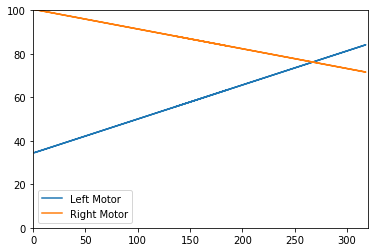

In [16]:
# combine left & right motor targets
y = np.column_stack((yLeft,yRight))

# fit a linear model using Ordinary Least Squares
ols = linear_model.LinearRegression().fit(X,y)

# plot model
plt.ylim([0,100])
plt.xlim([0,320])
plt.gca().plot(X,ols.predict(X))
plt.gca().legend(["Left Motor","Right Motor"])

print(ols.predict([[100]]))